In [74]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [75]:
df = pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [76]:
df.describe().T.style.set_properties()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [77]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [78]:
df.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  A

Some attributes have multiple unique values , we will need to clean the data

In [79]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

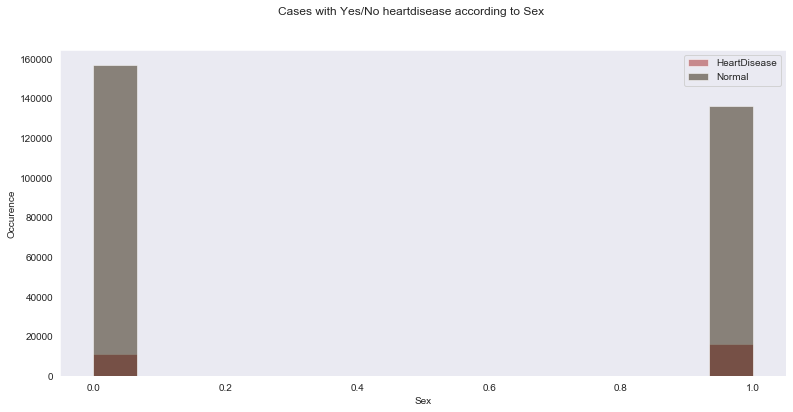

In [80]:
# Histogram Cases of Heart Disease according to sex 
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Sex"], bins=15, alpha=0.5, color="brown", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Sex"], bins=15, alpha=0.5, color="#271901", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Occurence")

fig.suptitle("Cases with Yes/No heartdisease according to Sex")

ax.legend();



Smokers suffer the largest of heart disease


Data also shows non-smokers with heart disease issue

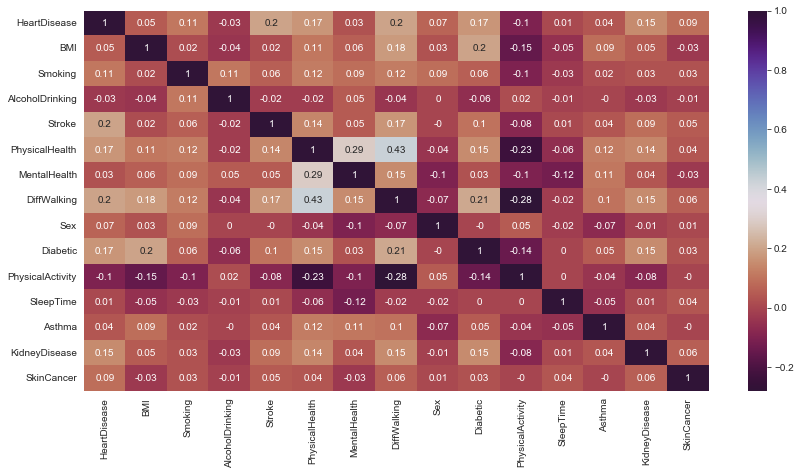

In [81]:
cor= df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(cor, annot = True, cmap = 'twilight_shifted_r')

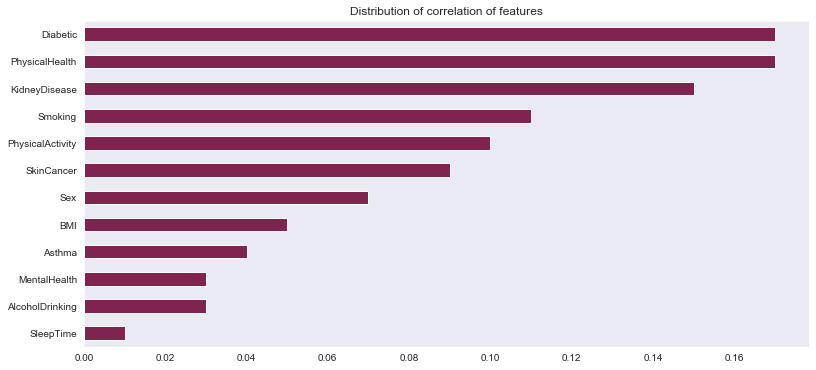

In [82]:
sns.set_style('dark')
sns.set_palette('twilight_shifted_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(cor['HeartDisease']).sort_values()[:-3].plot.barh()
plt.show()

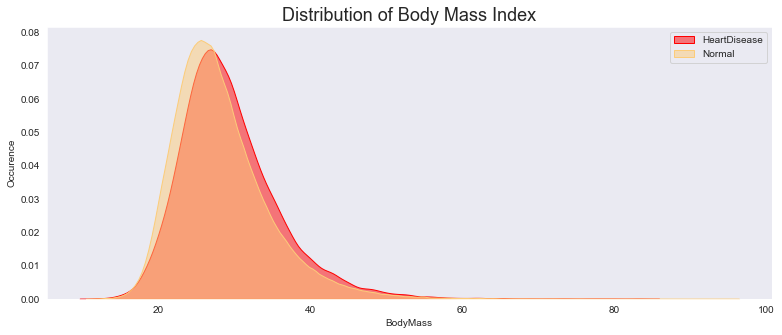

In [83]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

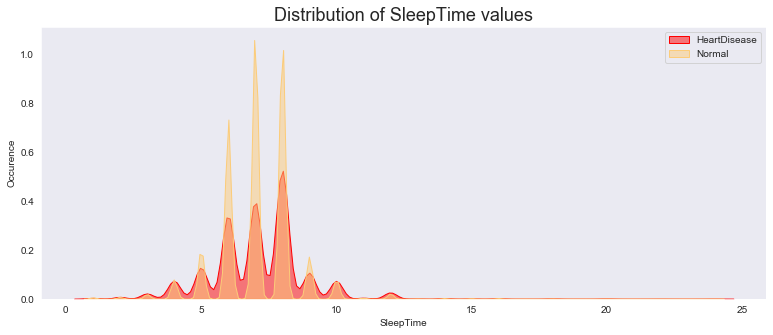

In [84]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

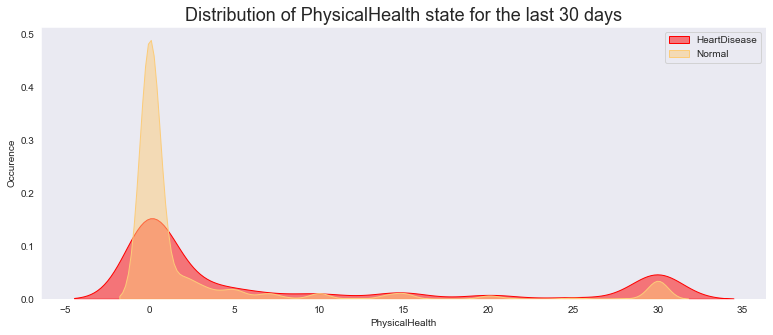

In [85]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

## Split Data / Train & Test

In [107]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)


In [87]:
target = df['HeartDisease']

In [109]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


In [111]:
scaler = StandardScaler()
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: '45-49'

In [92]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [93]:
X_train


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
213522,30.90,0,1,0,0.0,0.0,0,0,45-49,White,0,1,Very good,9.0,0,0,0
124144,29.44,1,1,0,0.0,0.0,0,0,60-64,White,0,0,Good,6.0,0,0,0
230019,20.60,0,0,0,0.0,0.0,0,0,40-44,White,0,1,Excellent,8.0,0,0,0
209955,23.11,1,0,1,0.0,11.0,0,1,25-29,White,0,1,Fair,8.0,0,0,0
165246,35.26,1,0,0,0.0,0.0,0,1,30-34,White,0,0,Good,7.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,23.63,1,0,0,30.0,0.0,1,1,55-59,White,1,1,Poor,8.0,0,0,0
156845,22.31,0,0,0,1.0,29.0,0,0,25-29,American Indian/Alaskan Native,0,1,Very good,7.0,1,0,0
256753,32.92,1,0,0,0.0,0.0,0,0,65-69,White,1,0,Fair,7.0,0,0,0
200099,30.41,0,0,0,0.0,0.0,0,0,40-44,Hispanic,0,0,Very good,6.0,1,0,0


In [94]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

ValueError: could not convert string to float: '45-49'

In [95]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

ValueError: could not convert string to float: '45-49'

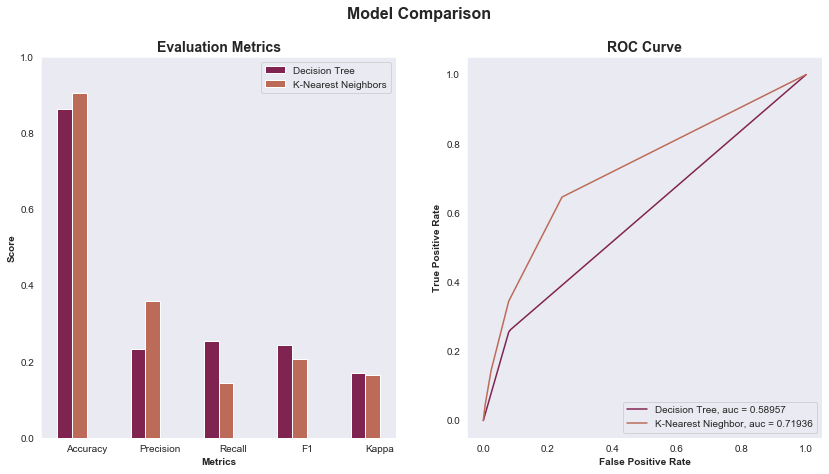

In [96]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [62]:
df.isnull().values.any()

False

In [63]:
# Checking for imbalanced data based on sex.
df['Sex'].value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

In [67]:
# Checking for any correlations.
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.174782,-0.100030,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,0.200443,-0.150616,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.055544,-0.097174,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.057786,0.017487,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.104467,-0.079455,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.153975,-0.232283,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,0.029709,-0.095808,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.209255,-0.278524,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.002054,0.048247,-0.015704,-0.069191,-0.009084,0.013434
Diabetic,0.174782,0.200443,0.055544,-0.057786,0.104467,0.153975,0.029709,0.209255,-0.002054,1.000000,-0.136599,0.003452,0.046886,0.149113,0.034077


##K-Nearest Neighbours

In [68]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [71]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

ValueError: could not convert string to float: '70-74'

In [72]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

334.5579172579839

In [73]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

ValueError: could not convert string to float: '70-74'

In [97]:
y_pred = classifier.predict(x_test)
y_pred

ValueError: could not convert string to float: '80 or older'

In [98]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

NameError: name 'y_pred' is not defined

In [99]:
print(accuracy_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

SVM Model

In [100]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


ValueError: could not convert string to float: '70-74'

In [101]:
y_pred = clf.predict(x_test)
y_pred

ValueError: could not convert string to float: '80 or older'

In [102]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

NameError: name 'y_pred' is not defined

In [103]:
print(accuracy_score(y_test,y_pred))

NameError: name 'y_pred' is not defined

Random Forest Model

In [104]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

ValueError: could not convert string to float: '70-74'

In [105]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

NameError: name 'rf_predicted' is not defined

In [106]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100)

NameError: name 'rf_predicted' is not defined